<a href="https://colab.research.google.com/github/Kggzzz/Project_2021_matchingcolor/blob/main/Cloud_DB_and_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install azure-data-tables

     |████████████████████████████████| 108 kB 12.1 MB/s 
     |████████████████████████████████| 85 kB 3.3 MB/s 
     |████████████████████████████████| 178 kB 50.4 MB/s 
     |████████████████████████████████| 41 kB 482 kB/s 


#Azure Table (Cloud DB)

1. creat DB on Azure Portal 
2. insert data
3. query data 

In [4]:
from azure.data.tables import TableServiceClient
from azure.data.tables import TableEntity

In [2]:
#from azure.data.tables import TableServiceClient
#from azure.data.tables import TableEntity

#from azure.core.credentials import AzureNamedKeyCredential

#credential = AzureNamedKeyCredential("pondaiprototype", "FxgRRzZV8UHdlKIHod1v6nEek+HwmB0u/idvPBBOCi2kzFG9i2GYHfoZECi3ZIGAgkuZs3LkhqaQ/Mf0Llyohg==")
#table_service = TableServiceClient(endpoint="testdb", credential=credential)

In [5]:
table_service = TableServiceClient.from_connection_string(conn_str='DefaultEndpointsProtocol=https;AccountName=pondaiprototype;AccountKey=FxgRRzZV8UHdlKIHod1v6nEek+HwmB0u/idvPBBOCi2kzFG9i2GYHfoZECi3ZIGAgkuZs3LkhqaQ/Mf0Llyohg==;EndpointSuffix=core.windows.net')

#Insert data

In [6]:
table_client = table_service.get_table_client(table_name="testdb")

In [8]:
task = TableEntity()
task[u'PartitionKey'] = u'part4' 
task[u'RowKey'] = u'004' #ห้ามซ้ำ
task[u'description'] = u'start4'
task[u'age'] = 22
table_client.create_entity(task)

{'date': datetime.datetime(2022, 2, 8, 2, 48, 47, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T02%3A48%3A47.8541648Z\'"',
 'version': '2019-02-02'}

In [10]:
task = {u'PartitionKey': u'part2', u'RowKey': u'004',
        u'name': u'python', u'room': 'online',u'age':3}
table_client.create_entity(entity=task)

{'date': datetime.datetime(2022, 2, 8, 2, 54, 50, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T02%3A54%3A50.947784Z\'"',
 'version': '2019-02-02'}

#query data 

In [ ]:
table_client = table_service.get_table_client(table_name="testdb")

In [11]:
task = table_client.get_entity('part4', '004')
print(task)

{'PartitionKey': 'part4', 'RowKey': '004', 'description': 'start4', 'age': 22}


In [12]:
for i in range(10):
  task = {u'PartitionKey': u'partQ4', u'RowKey': f'00{i+10}',
        u'name': u'python', u'room': 'online',u'age':i}
  table_client.create_entity(entity=task)

#query by logic ดึงข้อมูลมาประมวลผล

In [14]:
task = table_client.query_entities(query_filter="age gt 5")
print(task)

<iterator object azure.core.paging.ItemPaged at 0x7f820f9d7190>


In [15]:
for t in task:
    print(t)

{'PartitionKey': 'part1', 'RowKey': '001', 'description': 'stat', 'age': 30}
{'PartitionKey': 'part1', 'RowKey': '002', 'name': 'python', 'room': 'online', 'age': 14}
{'PartitionKey': 'part1', 'RowKey': '003', 'name': 'stat', 'age': 30}
{'PartitionKey': 'part1', 'RowKey': '004', 'name': 'stat', 'age': 30}
{'PartitionKey': 'part4', 'RowKey': '004', 'description': 'start4', 'age': 22}
{'PartitionKey': 'part5', 'RowKey': '011', 'name': 'Moltira', 'age': 30}
{'PartitionKey': 'part6', 'RowKey': '012', 'name': 'python4', 'room': 'online', 'age': 30}
{'PartitionKey': 'partQ1', 'RowKey': '0016', 'name': 'python', 'room': 'online', 'age': 6}
{'PartitionKey': 'partQ1', 'RowKey': '0017', 'name': 'python', 'room': 'online', 'age': 7}
{'PartitionKey': 'partQ1', 'RowKey': '0018', 'name': 'python', 'room': 'online', 'age': 8}
{'PartitionKey': 'partQ1', 'RowKey': '0019', 'name': 'python', 'room': 'online', 'age': 9}
{'PartitionKey': 'partQ4', 'RowKey': '0016', 'name': 'python', 'room': 'online', 'age'

#Install the SDK

In [16]:
!pip install azure-cognitiveservices-vision-computervision

In [31]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials


credentials = CognitiveServicesCredentials('1e39933e32bc4ba2900a93536bb26658')
client = ComputerVisionClient(
    endpoint="https://southeastasia.api.cognitive.microsoft.com/",
    credentials=credentials
)

In [32]:
url = "https://pondaiprototype.blob.core.windows.net/pics/1101.jpg"

image_analysis = client.analyze_image(url,visual_features=[VisualFeatureTypes.faces])

for tag in image_analysis.faces:
    print(tag)

{'additional_properties': {}, 'age': 20, 'gender': <Gender.female: 'Female'>, 'face_rectangle': <azure.cognitiveservices.vision.computervision.models._models_py3.FaceRectangle object at 0x7f820f376310>}


In [33]:
import cv2

In [34]:
from matplotlib import pyplot as plt

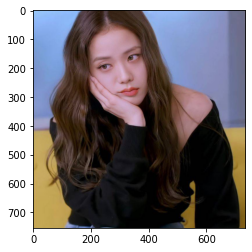

In [35]:
img = cv2.imread('/content/122476997_199849828179317_5527338001043820388_n.jpg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [36]:
img2=cv2.rectangle(img, (tag.face_rectangle.left, tag.face_rectangle.top),
                   (tag.face_rectangle.left+tag.face_rectangle.width, tag.face_rectangle.top+tag.face_rectangle.height),(0,0,225),5)

20
Gender.female


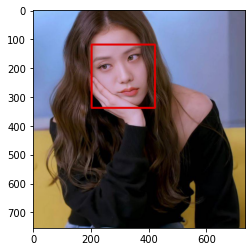

In [37]:
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
print(tag.age)
print(tag.gender)